### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [95]:
import numpy as np
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#to split data into test and train
from sklearn.model_selection import train_test_split
#to apply z-score
from scipy.stats import zscore
from scipy.spatial.distance import cdist

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [105]:
vehicle_ds=pd.read_csv("vehicle.csv")
#vehicle_ds.head()
vehicle_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [106]:
vehicle_ds.dropna(axis=0,inplace=True)
vehicle_ds.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [107]:
vehicle_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

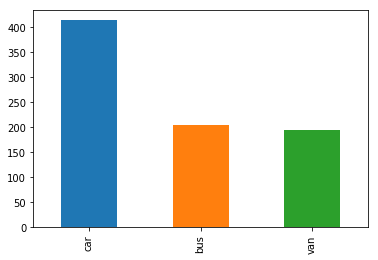

In [100]:
vehicle_ds["class"].value_counts().plot.bar()

### Check for any missing values in the data 

In [101]:
vehicle_ds.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [109]:
vehicle_ds.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [113]:
#numeric_cols =vehicle_ds.select_dtypes(include=[np.number]).columns
vehicle=vehicle_ds.drop(labels='class',axis=1)
vehicle = vehicle.apply(zscore)
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 4. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [103]:
distortion=[]

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [93]:
#cluster_range = range( 1, 10)  #number of k 1 to 10  
#for num_clusters in cluster_range:
#  clusters = KMeans( num_clusters, n_init = 5)
#  clusters.fit(mpg_df_attr)
#  labels = clusters.labels_
#  centroids = clusters.cluster_centers_
#  distortion.append( clusters.inertia_ )
#clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
#clusters_df[0:15]

In [114]:
#from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
#vehicle_ds_ind_variables = vehicle_ds.drop("class",axis=1)
cluster_range=range(1,10)
distortion=[]
for k in cluster_range:
    model=KMeans(n_clusters=k)
    model.fit(vehicle)
    prediction=model.predict(vehicle)
    distortion.append(sum(np.min(cdist(vehicle, model.cluster_centers_, 'euclidean'), axis=1)) / vehicle.shape[0])
  

In [116]:
  clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion } )
  clusters_df   

,num_clusters,cluster_errors
0,1,3.939299
1,2,2.966824
2,3,2.642794
3,4,2.548617
4,5,2.428515
5,6,2.315565
6,7,2.242101
7,8,2.176625
8,9,2.112900


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

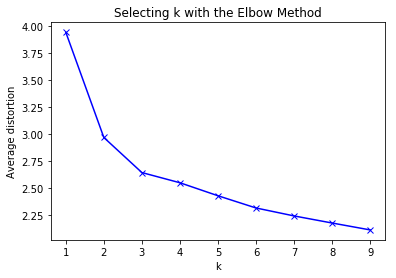

In [117]:
plt.plot(cluster_range, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

The bend is coming out clearly as 3

### Find out the optimal value of K

In [62]:
# Let us do with K = 3
k_model_3=KMeans(n_clusters=3)
k_model_3.fit(vehicle_ds_ind_variables)
prediction=k_model_3.predict(vehicle_ds_ind_variables)

#Append the prediction 
vehicle_ds["predict_class"] = prediction
print("Groups Assigned : \n")
vehicle_ds[["class", "predict_class"]]

Groups Assigned : 



,class,predict_class
0,van,2
1,van,2
2,car,1
3,van,2
4,bus,2
6,bus,2
7,van,2
8,van,2
10,van,2
11,car,2


k =3 seems to be the optimal 

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [125]:
cluster = KMeans(3)
cluster.fit(vehicle)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [129]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466],
       [-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [128]:
centroid_df = pd.DataFrame(centroids, columns = list(vehicle) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
1,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
2,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [122]:
cluster.labels_

array([1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0,
       2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1,
       0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2,
       1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [161]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [162]:
new_array=np.concatenate((a, b,c), axis=0)
new_array

array([[ 1.04952434e+01, -1.40829863e+00],
       [ 1.03482535e+01, -2.80233634e+00],
       [ 1.08835769e+01, -1.26980137e+00],
       [ 1.68344405e+01, -5.40559866e-01],
       [ 1.01123615e+01, -1.96763941e+00],
       [ 8.72074729e+00,  6.01808321e-01],
       [ 9.64245446e+00,  1.59981390e+00],
       [ 1.29021696e+01,  4.58954460e+00],
       [ 7.95075777e+00,  2.32794619e+00],
       [ 1.07456629e+01, -2.39584836e+00],
       [ 1.12985390e+01,  7.61400973e-01],
       [ 8.62653219e+00,  6.49189932e-01],
       [ 1.07191647e+01,  2.02717732e+00],
       [ 6.87631516e+00, -8.01277958e-01],
       [ 7.99094072e+00,  1.90276843e+00],
       [ 8.90740630e+00, -2.85345536e+00],
       [ 9.21835948e+00,  7.95858077e-02],
       [ 8.30248688e+00, -8.34630353e-01],
       [ 9.97190186e+00, -1.21560893e+00],
       [ 1.17410392e+01,  3.21895556e+00],
       [ 9.67157658e+00, -2.71673383e+00],
       [ 8.45806025e+00, -1.91211109e+00],
       [ 8.52123906e+00,  1.76341885e+00],
       [ 1.

In [163]:
df = pd.DataFrame(new_array,columns=['column1','column2'])
df

,column1,column2
0,10.495243,-1.408299
1,10.348253,-2.802336
2,10.883577,-1.269801
3,16.834441,-0.540560
4,10.112361,-1.967639
5,8.720747,0.601808
6,9.642454,1.599814
7,12.902170,4.589545
8,7.950758,2.327946
9,10.745663,-2.395848


### 10. Use scatter matrix to print all the 3 distributions

F:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


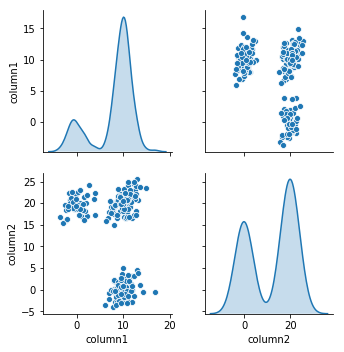

In [164]:
from pandas.tools.plotting import scatter_matrix
sns.pairplot(df,diag_kind='kde')


### 11. Find out the linkage matrix

In [165]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.cluster import AgglomerativeClustering 

Use ward as linkage metric and distance as Eucledian

In [166]:
model_hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model_hier.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [167]:
Z = linkage(df, 'ward')
Z

array([[1.73000000e+02, 2.48000000e+02, 1.40887471e-02, 2.00000000e+00],
       [3.70000000e+01, 7.10000000e+01, 1.88274586e-02, 2.00000000e+00],
       [1.06000000e+02, 1.31000000e+02, 6.90986879e-02, 2.00000000e+00],
       [1.94000000e+02, 2.13000000e+02, 7.08664063e-02, 2.00000000e+00],
       [2.37000000e+02, 2.40000000e+02, 7.24237664e-02, 2.00000000e+00],
       [1.80000000e+01, 2.80000000e+01, 8.95377000e-02, 2.00000000e+00],
       [2.10000000e+01, 6.40000000e+01, 9.58498614e-02, 2.00000000e+00],
       [4.60000000e+01, 9.20000000e+01, 9.60568020e-02, 2.00000000e+00],
       [1.02000000e+02, 1.49000000e+02, 1.05031230e-01, 2.00000000e+00],
       [5.00000000e+00, 1.10000000e+01, 1.05458528e-01, 2.00000000e+00],
       [1.60000000e+01, 3.30000000e+01, 1.15906951e-01, 2.00000000e+00],
       [2.22000000e+02, 2.50000000e+02, 1.17840996e-01, 3.00000000e+00],
       [1.07000000e+02, 1.28000000e+02, 1.18324835e-01, 2.00000000e+00],
       [1.82000000e+02, 1.87000000e+02, 1.19313067e

### 12. Plot the dendrogram for the consolidated dataframe

In [168]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

c, coph_dists = cophenet(Z , pdist(df))

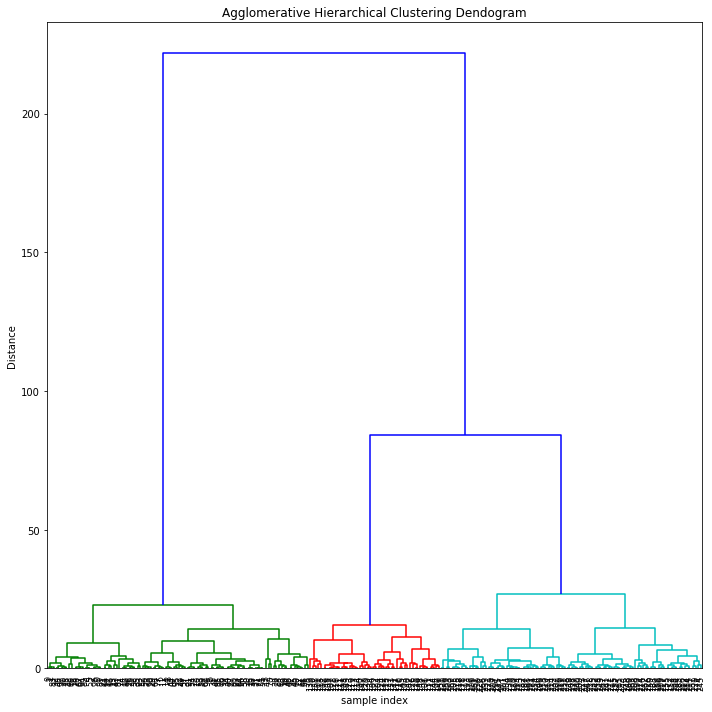

In [169]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [53.75, 53.75, 100.0, 100.0],
  [20.0, 20.0, 76.875, 76.875]],
 'dcoord': [[0.0, 12.220606879989866, 12.220606879989866, 0.0],
  [0.0, 16.774934211055978, 16.774934211055978, 0.0],
  [12.220606879989866,
   24.493781603410884,
   24.493781603410884,
   16.774934211055978],
  [0.0, 13.749446557618416, 13.749446557618416, 0.0],
  [0.0, 15.874694391524168, 15.874694391524168, 13.749446557618416],
  [0.0, 19.775896711967146, 19.775896711967146, 15.874694391524168],
  [0.0, 10.598996790989512, 10.598996790989512, 0.0],
  [0.0, 11.9073214146207, 11.9073214146207, 0.0],
  [10.598996790989512, 20.3012308218827, 20.3012308218827, 11.9073214146207],
  [19.775896711967146, 80.15338660241196, 80.15338660241196, 20.3012308218827],
  [2

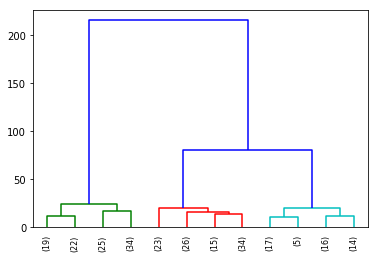

In [157]:
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.,truncate_mode='lastp',p=12)

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [171]:
#from the above truncated dendogram the optimal distance is 30 i.e. t=30

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [172]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, t=30, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

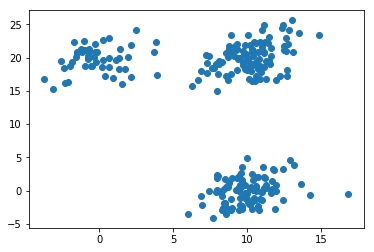

In [173]:
plt.scatter(df["column1"], df["column2"])